In [1]:
import pandas as pd # нужен
import matplotlib.pyplot as plt # нужен
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import seaborn as sns # нужен
import numpy as np # нужен
import math
from sklearn import datasets, linear_model, model_selection # ne nado
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix # ne nado
from sklearn.metrics import classification_report # ne nado
from sklearn.preprocessing import MinMaxScaler # ne nado
from sklearn.model_selection import train_test_split # ne nado
from sklearn.metrics.pairwise import euclidean_distances # ne nado
from sklearn.cluster import Birch # ne nado


path = (r'/home/ivan/fff/global_food_prices.csv') # Импортируем данные
df = pd.read_csv(path) # Читаем данные

/tmp/ipykernel_73671/2413384502.py:18: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path) # Читаем данные


In [2]:
df.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050638 entries, 0 to 2050637
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   adm0_id             float64
 1   adm0_name           object 
 2   adm1_id             int64  
 3   adm1_name           object 
 4   mkt_id              int64  
 5   mkt_name            object 
 6   cm_id               int64  
 7   cm_name             object 
 8   cur_id              float64
 9   cur_name            object 
 10  pt_id               int64  
 11  pt_name             object 
 12  um_id               int64  
 13  um_name             object 
 14  mp_month            int64  
 15  mp_year             int64  
 16  mp_price            float64
 17  mp_commoditysource  float64
dtypes: float64(4), int64(7), object(7)
memory usage: 281.6+ MB


In [4]:
df.describe()

,adm0_id,adm1_id,mkt_id,cm_id,cur_id,pt_id,um_id,mp_month,mp_year,mp_price,mp_commoditysource
count,2.050638e+06,2.050638e+06,2.050638e+06,2.050638e+06,2050638.0,2.050638e+06,2.050638e+06,2.050638e+06,2.050638e+06,2.050638e+06,0.0
mean,1.004064e+03,2.631071e+04,1.591207e+03,2.201166e+02,0.0,1.491768e+01,1.486924e+01,6.363021e+00,2.016131e+03,6.413984e+03,NaN
std,7.163519e+03,1.159529e+05,1.181314e+03,1.938963e+02,0.0,2.831222e-01,2.598690e+01,3.403189e+00,4.458825e+00,1.069772e+05,NaN
min,1.000000e+00,0.000000e+00,8.000000e+01,5.000000e+01,0.0,1.400000e+01,5.000000e+00,1.000000e+00,1.990000e+03,0.000000e+00,NaN
25%,1.050000e+02,1.510000e+03,6.440000e+02,7.300000e+01,0.0,1.500000e+01,5.000000e+00,3.000000e+00,2.014000e+03,4.500000e+01,NaN
50%,1.500000e+02,2.156000e+03,1.441000e+03,1.410000e+02,0.0,1.500000e+01,5.000000e+00,6.000000e+00,2.017000e+03,2.465558e+02,NaN
75%,2.050000e+02,3.433000e+03,2.331000e+03,3.030000e+02,0.0,1.500000e+01,9.000000e+00,9.000000e+00,2.020000e+03,1.200000e+03,NaN
max,7.000100e+04,9.000220e+05,6.083000e+03,8.930000e+02,0.0,1.800000e+01,1.750000e+02,1.200000e+01,2.021000e+03,2.177778e+07,NaN


In [5]:
df = df.drop(columns = ["mp_commoditysource"],axis =1)

In [6]:
df=df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1439622 entries, 0 to 2050637
Data columns (total 17 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   adm0_id    1439622 non-null  float64
 1   adm0_name  1439622 non-null  object 
 2   adm1_id    1439622 non-null  int64  
 3   adm1_name  1439622 non-null  object 
 4   mkt_id     1439622 non-null  int64  
 5   mkt_name   1439622 non-null  object 
 6   cm_id      1439622 non-null  int64  
 7   cm_name    1439622 non-null  object 
 8   cur_id     1439622 non-null  float64
 9   cur_name   1439622 non-null  object 
 10  pt_id      1439622 non-null  int64  
 11  pt_name    1439622 non-null  object 
 12  um_id      1439622 non-null  int64  
 13  um_name    1439622 non-null  object 
 14  mp_month   1439622 non-null  int64  
 15  mp_year    1439622 non-null  int64  
 16  mp_price   1439622 non-null  float64
dtypes: float64(3), int64(7), object(7)
memory usage: 197.7+ MB


In [8]:
df['cur_name'].unique()

array(['AFN', 'DZD', 'AOA', 'ARS', 'BDT', 'BYR', 'XOF', 'BOB', 'BIF',
       'KHR', 'XAF', 'CVE', 'CNY', 'COP', 'CDF', 'DJF', 'USD', 'ERN',
       'ETB', 'GMD', 'GEL', 'GHS', 'GNF', 'HTG', 'IRR', 'JPY', 'KZT',
       'KES', 'LAK', 'LSL', 'LRD', 'MGA', 'MWK', 'MRO', 'MXN', 'MDL',
       'MNT', 'MMK', 'NAD', 'NPR', 'NGN', 'PKR', 'PYG', 'PEN', 'PHP',
       'RUB', 'RWF', 'SLL', 'SOS', 'ZAR', 'NIS', 'SDG', 'SYP', 'THB',
       'UGX', 'TZS', 'VND', 'YER', 'ZMW', 'ZWL'], dtype=object)

In [9]:
df['adm0_name'].unique() # countries

array(['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Bangladesh',
       'Belarus', 'Benin', 'Bolivia', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Cape Verde', 'Central African Republic',
       'China', 'Colombia', 'Congo', "Cote d'Ivoire",
       'Democratic Republic of the Congo', 'Djibouti', 'Ecuador',
       'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Georgia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Iran  (Islamic Republic of)',
       'Japan', 'Kazakhstan', 'Kenya', "Lao People's Democratic Republic",
       'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mexico', 'Moldova Republic of', 'Mongolia', 'Myanmar', 'Namibia',
       'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Paraguay', 'Peru',
       'Philippines', 'Russian Federation', 'Rwanda', 'Senegal',
       'Sierra Leone', 'Somalia', 'South Africa', 'State of Palestine',
       'Sudan', 'Syrian Arab Republic', 'Thailand', 'Timor-Leste', 'Togo',
       'Uganda', 'United 

In [10]:
df['adm1_name'].unique() # cities

array(['Badakhshan', 'Badghis', 'Baghlan', 'Balkh', 'Bamyan', 'Farah',
       'Faryab', 'Ghazni', 'Ghor', 'Hilmand', 'Hirat', 'Jawzjan', 'Kabul',
       'Kandahar', 'Kapisa', 'Khost', 'Kunar', 'Kunduz', 'Laghman',
       'Logar', 'Nangarhar', 'Nimroz', 'Nuristan', 'Paktika', 'Paktya',
       'Parwan', 'Samangan', 'Sar-e-Pul', 'Takhar', 'Uruzgan', 'Wardak',
       'Zabul', 'Daykundi', 'Panjsher', 'Alger', 'Tindouf', 'Luanda',
       'Lunda Norte', 'Buenos Aires D.f.', 'Santa Fe', 'Barisal',
       'Chittagong', 'Dhaka', 'Khulna', 'Rajshahi', 'Sylhet', 'Rangpur',
       'Minsk City', 'Alibori', 'Atakora', 'Atlantique', 'Borgou',
       'Collines', 'Couffo', 'Donga', 'Littoral', 'Mono', 'Oueme',
       'Plateau', 'Zou', 'Pando', 'Beni', 'Chuquisaca', 'Cochabamba',
       'La Paz', 'Oruro', 'Potosi', 'Santa Cruz', 'Tarija',
       'Boucle Du Mouhoun', 'Cascades', 'Centre', 'Centre-est',
       'Centre-nord', 'Centre-ouest', 'Centre-sud', 'Est',
       'Hauts-bassins', 'Nord', 'Plateau Cent

In [11]:
df['mkt_name'].unique() # magazines

array(['Fayzabad', 'Mazar', 'Badakhshan', ..., 'Rutendo 6', 'Matibi',
       'Mbilashaba'], dtype=object)

In [12]:
df['cm_name'].unique() # food

array(['Bread - Retail', 'Wheat - Retail', 'Rice (low quality) - Retail',
       'Wage (qualified labour) - Retail',
       'Livestock (sheep, one-year-old alive female) - Retail',
       'Fuel (diesel) - Retail', 'Exchange rate - Retail',
       'Wage (non-qualified labour, non-agricultural) - Retail',
       'Oil (cooking) - Retail', 'Sugar - Retail', 'Pulses - Retail',
       'Wheat flour (high quality) - Retail', 'Salt - Retail',
       'Rice (high quality) - Retail',
       'Wheat flour (low quality) - Retail', 'Wheat flour - Retail',
       'Rice - Retail', 'Beans (white) - Retail', 'Milk - Retail',
       'Potatoes - Retail', 'Eggs - Retail', 'Meat (chicken) - Retail',
       'Lentils - Retail', 'Pasta - Retail', 'Tomatoes - Retail',
       'Oil - Retail', 'Meat (beef) - Retail', 'Cheese (dry) - Retail',
       'Carrots - Retail', 'Onions - Retail', 'Bananas - Retail',
       'Tea - Retail', 'Fuel (petrol-gasoline) - Retail',
       'Fish (canned) - Retail', 'Apples - Retail', '

In [13]:
df['pt_name'].unique() # type of food

array(['Retail', 'Wholesale', 'Producer', 'Farm Gate'], dtype=object)

In [14]:
df['adm0_id'] # transfer to INT!!!

0            1.0
1            1.0
2            1.0
3            1.0
4            1.0
           ...  
2050633    271.0
2050634    271.0
2050635    271.0
2050636    271.0
2050637    271.0
Name: adm0_id, Length: 1439622, dtype: float64

In [15]:
df['cur_id'] # deleted

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
2050633    0.0
2050634    0.0
2050635    0.0
2050636    0.0
2050637    0.0
Name: cur_id, Length: 1439622, dtype: float64

In [16]:
df['mp_price'].unique() # ok, dont touch this

array([ 50.    ,  56.25  ,  65.25  , ...,  71.7299,  99.6333, 147.6666])

In [17]:
df = df.drop(columns = ["cur_id"],axis =1) # deleting cur_id

In [18]:
df.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,1,2014,50.0
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,2,2014,50.0
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,3,2014,50.0
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,4,2014,50.0
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,5,2014,50.0


In [19]:
df["adm0_id"] = df["adm0_id"].astype(int)

In [20]:
df['adm0_id'].unique()

array([    1,     4,     8,    12,    23,    26,    29,    33,    42,
          43,    44,    45,    47,    49,    52,    57,    59,    66,
          68,    70,    73,    77,    79,    89,    90,    92,    94,
         106,   105,   108,   117,   126,   132,   133,   139,   142,
         144,   150,   152,   155,   159,   162,   165,   167,   171,
         172,   175,   181,   182,   188,   194,   195,   196,   204,
         205,   217,   221,   226,   227,   999, 40764,   238,   240,
         242,   243,   253,   257,   264,   269,   270,   271])

In [21]:
df.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,1,2014,50.0
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,2,2014,50.0
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,3,2014,50.0
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,4,2014,50.0
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,5,2014,50.0


Data description:

Data includes country, locality, market, goods purchased, price & currency used, quantity exchanged, and month/year of purchase. (Данные включают страну, населенный пункт, рынок, приобретенные товары, использованную цену и валюту, обмененное количество и месяц / год покупки.)

adm0_id: country id (Айди страны)

adm0_name: country name (Название страны)


adm1_id: locality id (Айди региона)

adm1_name: locality name (Название региона)


mkt_id: market id (Айди магазина)

mkt_name: market name (Название магазина)


cm_id: commodity purchase id (Айди покупки)

cm_name: commodity purchased (Название купленного товара)


cur_name: name of currency (Имя валюты)


pt_id: market type id (Айди типа магазина)

pt_name: market type (Retail/Wholesale/Producer/Farm Gate) (Виды магазинов (Розница, Опт, Производитель, Из фермы))



um_id: measurement id (Пока не понятно)

um_name: unit of goods measurement (единица измерения товара)


mp_month: month recorded (Месяц покупки)

mpyear: year recorded (Год покупки)


mpprice: price paid (Цена)

In [22]:
# перевести все в доллары, узнать самый дорогой, самый дешевый товар, узнать самый популярны товар, посмотреть на это самые товары как цена менялась на них со временем, и в разных странах.
# Потом посмотреть по месяцам какие товары имеют сезонность.# Где чаще всего люди закупаются(какой тип магазина). 
# Можно посмотреть самый бедный и самый богатый регион.
# Сделать регрессионную модель, которая будет предсказывать цену на продукты в разных странах!!!!


# Перевод валют в доллары

In [23]:
df.loc[(df['cur_name'] =='AFN'), 'mp_price'] = df['mp_price'] * 0.11
df.loc[(df['cur_name'] =='DZD'), 'mp_price'] = df['mp_price'] * 0.0068     # 0,0068
df.loc[(df['cur_name'] =='AOA'), 'mp_price'] = df['mp_price'] * 0.0023     # 0,0023
df.loc[(df['cur_name'] =='ARS'), 'mp_price'] = df['mp_price'] * 0.0080     # 0,0080
df.loc[(df['cur_name'] =='BDT'), 'mp_price'] = df['mp_price'] * 0.011      # 0,011
df.loc[(df['cur_name'] =='BYR'), 'mp_price'] = df['mp_price'] * 0.30       # 0,30
df.loc[(df['cur_name'] =='XOF'), 'mp_price'] = df['mp_price'] * 0.0016     # 0,0016
df.loc[(df['cur_name'] =='BOB'), 'mp_price'] = df['mp_price'] * 0.15       # 0,15
df.loc[(df['cur_name'] =='BIF'), 'mp_price'] = df['mp_price'] * 0.00049    # 0,00049
df.loc[(df['cur_name'] =='KHR'), 'mp_price'] = df['mp_price'] * 0.00025    # 0,00025
df.loc[(df['cur_name'] =='XAF'), 'mp_price'] = df['mp_price'] * 0.0016     # 0,0016
df.loc[(df['cur_name'] =='CVE'), 'mp_price'] = df['mp_price'] * 0.0095     # 0,0095
df.loc[(df['cur_name'] =='CNY'), 'mp_price'] = df['mp_price'] * 0.15       # 0,15
df.loc[(df['cur_name'] =='COP'), 'mp_price'] = df['mp_price'] * 0.00024    # 0,00024
df.loc[(df['cur_name'] =='CDF'), 'mp_price'] = df['mp_price'] * 0.00050    # 0,00050
df.loc[(df['cur_name'] =='DJF'), 'mp_price'] = df['mp_price'] * 0.0056     # 0,0056 
df.loc[(df['cur_name'] =='ERN'), 'mp_price'] = df['mp_price'] * 0.066      # 0.066
df.loc[(df['cur_name'] =='ETB'), 'mp_price'] = df['mp_price'] * 0.019      # 0,019
df.loc[(df['cur_name'] =='GMD'), 'mp_price'] = df['mp_price'] * 0.018      # 0,018
df.loc[(df['cur_name'] =='GEL'), 'mp_price'] = df['mp_price'] * 0.34       # 0,34
df.loc[(df['cur_name'] =='GHS'), 'mp_price'] = df['mp_price'] * 0.12       # 0,12
df.loc[(df['cur_name'] =='GNF'), 'mp_price'] = df['mp_price'] * 0.00012    # 0,00012
df.loc[(df['cur_name'] =='HTG'), 'mp_price'] = df['mp_price'] * 0.0087     # 0,0087
df.loc[(df['cur_name'] =='IRR'), 'mp_price'] = df['mp_price'] * 0.000024   # 0,000024
df.loc[(df['cur_name'] =='JPY'), 'mp_price'] = df['mp_price'] * 0.0074     # 0,0074
df.loc[(df['cur_name'] =='KZT'), 'mp_price'] = df['mp_price'] * 0.0022     # 0,0022
df.loc[(df['cur_name'] =='KES'), 'mp_price'] = df['mp_price'] * 0.0085     # 0,0085
df.loc[(df['cur_name'] =='LAK'), 'mp_price'] = df['mp_price'] * 0.000067   # 0,000067
df.loc[(df['cur_name'] =='LSL'), 'mp_price'] = df['mp_price'] * 0.061      # 0,061
df.loc[(df['cur_name'] =='LRD'), 'mp_price'] = df['mp_price'] * 0.0066     # 0,0066
df.loc[(df['cur_name'] =='MGA'), 'mp_price'] = df['mp_price'] * 0.00025    # 0,00025
df.loc[(df['cur_name'] =='MWK'), 'mp_price'] = df['mp_price'] * 0.00097    # 0,00097
df.loc[(df['cur_name'] =='MRO'), 'mp_price'] = df['mp_price'] * 0.027      # 0,027
df.loc[(df['cur_name'] =='MXN'), 'mp_price'] = df['mp_price'] * 0.049      # 0,049
df.loc[(df['cur_name'] =='MDL'), 'mp_price'] = df['mp_price'] * 0.052      # 0,052
df.loc[(df['cur_name'] =='MNT'), 'mp_price'] = df['mp_price'] * 0.00032    # 0,00032
df.loc[(df['cur_name'] =='MMK'), 'mp_price'] = df['mp_price'] * 0.00054    # 0,00054
df.loc[(df['cur_name'] =='NAD'), 'mp_price'] = df['mp_price'] * 0.063      # 0,063
df.loc[(df['cur_name'] =='NPR'), 'mp_price'] = df['mp_price'] * 0.0079     # 0,0079
df.loc[(df['cur_name'] =='NGN'), 'mp_price'] = df['mp_price'] * 0.0024     # 0,0024
df.loc[(df['cur_name'] =='PKR'), 'mp_price'] = df['mp_price'] * 0.0049     # 0,0049
df.loc[(df['cur_name'] =='PYG'), 'mp_price'] = df['mp_price'] * 0.00015    # 0,00015
df.loc[(df['cur_name'] =='PEN'), 'mp_price'] = df['mp_price'] * 0.26       # 0,26
df.loc[(df['cur_name'] =='PHP'), 'mp_price'] = df['mp_price'] * 0.018      # 0,018
df.loc[(df['cur_name'] =='RUB'), 'mp_price'] = df['mp_price'] * 0.018      # 0,018
df.loc[(df['cur_name'] =='RWF'), 'mp_price'] = df['mp_price'] * 0.00098    # 0,00098
df.loc[(df['cur_name'] =='SLL'), 'mp_price'] = df['mp_price'] * 0.000076   # 0,000076
df.loc[(df['cur_name'] =='SOS'), 'mp_price'] = df['mp_price'] * 0.0017     # 0,0017
df.loc[(df['cur_name'] =='ZAR'), 'mp_price'] = df['mp_price'] * 0.061      # 0,061
df.loc[(df['cur_name'] =='NIS'), 'mp_price'] = df['mp_price'] * 0.28       # 0,28
df.loc[(df['cur_name'] =='SDG'), 'mp_price'] = df['mp_price'] * 0.0022     # 0,0022
df.loc[(df['cur_name'] =='SYP'), 'mp_price'] = df['mp_price'] * 0.0004     # 0.0004
df.loc[(df['cur_name'] =='THB'), 'mp_price'] = df['mp_price'] * 0.028      # 0,028
df.loc[(df['cur_name'] =='UGX'), 'mp_price'] = df['mp_price'] * 0.00027    # 0,00027
df.loc[(df['cur_name'] =='TZS'), 'mp_price'] = df['mp_price'] * 0.00043    # 0,00043
df.loc[(df['cur_name'] =='VND'), 'mp_price'] = df['mp_price'] * 0.000043   # 0,000043
df.loc[(df['cur_name'] =='YER'), 'mp_price'] = df['mp_price'] * 0.0040     # 0,0040
df.loc[(df['cur_name'] =='ZMW'), 'mp_price'] = df['mp_price'] * 0.060      # 0,060
df.loc[(df['cur_name'] =='ZWL'), 'mp_price'] = df['mp_price'] * 0.0031     # 0,0031

# Самый популярный товар:

Самый популярный товар в принципе и в разных странах
Должно иметь вид: страна-товар

In [24]:
df['cm_name'].value_counts()
df.groupby((df['adm0_name'] =='Afghanistan'))['cm_name'].sort_values()

Millet - Retail                     52338
Rice (imported) - Retail            47962
Maize - Retail                      46427
Sorghum - Retail                    45509
Rice (local) - Retail               36009
                                    ...  
Butter (goat milk) - Retail             2
Butter (cow milk) - Retail              2
Kocho - Retail                          1
Sorghum (biofortified) - Retail         1
Beans (haricot, red) - Wholesale        1
Name: cm_name, Length: 707, dtype: int64

In [29]:
gkk = df.groupby([(df['adm0_name'] =='Afghanistan'), 'cm_name'])
gkk.first()
# ttg = df.groupby(['adm0_name', 'cm_name'])
#ttg.first()

adm0_id             adm0_name  \
adm0_name cm_name                                                              
False     Alcohol (spray) - Retail                 238  Syrian Arab Republic   
          Anchovies - Retail                       196           Philippines   
          Apples (red) - Retail                     90                Gambia   
          Apples (red) - Wholesale                  57              Colombia   
          Apples - Retail                            4               Algeria   
...                                                ...                   ...   
True      Wage (qualified labour) - Retail           1           Afghanistan   
          Wheat - Retail                             1           Afghanistan   
          Wheat flour (high quality) - Retail        1           Afghanistan   
          Wheat flour (low quality) - Retail         1           Afghanistan   
          Wheat flour - Retail                       1           Afghanistan   

                                               adm1_id  \
adm0_name cm_name                                        
False     Alcohol (spray) - Retail                2833   
          Anchovies - Retail                      2354   
          Apples (red) - Retail                   1285   
          Apples (red) - Wholesale                 948   
          Apples - Retail                          344   
...                                                ...   
True      Wage (qualified labour) - Retail         272   
          Wheat - Retail                           272   
          Wheat flour (high quality) - Retail      272   
          Wheat flour (low quality) - Retail       272   
          Wheat flour - Retail                     282   

                                                                            adm1_name  \
adm0_name cm_name                                                                       
False     Alcohol (spray) - Retail                                      Al_Qunaytirah   
          Anchovies - Retail                   Cordillera Administrative region (CAR)   
          Apples (red) - Retail                                         Central River   
          Apples (red) - Wholesale                                       Cundinamarca   
          Apples - Retail                                                       Alger   
...                                                                               ...   
True      Wage (qualified labour) - Retail                                 Badakhshan   
          Wheat - Retail                                                   Badakhshan   
          Wheat flour (high quality) - Retail                              Badakhshan   
          Wheat flour (low quality) - Retail                               Badakhshan   
          Wheat flour - Retail                                                  Hirat   

                                               mkt_id           mkt_name  \
adm0_name cm_name                                                          
False     Alcohol (spray) - Retail               1554        Khan Arnaba   
          Anchovies - Retail                     4266  Mountain Province   
          Apples (red) - Retail                   279            Bansang   
          Apples (red) - Wholesale                840             Bogota   
          Apples - Retail                        1794            Algiers   
...                                               ...                ...   
True      Wage (qualified labour) - Retail        266           Fayzabad   
          Wheat - Retail                          266           Fayzabad   
          Wheat flour (high quality) - Retail    3690         Badakhshan   
          Wheat flour (low quality) - Retail     3690         Badakhshan   
          Wheat flour - Retail                    270              Hirat   

                                               cm_id cur_name  pt_id  \
adm0_name cm_name               

# Разница цен на топ 10 товаров в разных странах

Должно иметь вид: страна - товар -  разница за рассматриваемый промеуток с 1993 по 2021

In [78]:
# pp_year - product price from this year
pp_1993 = df[df['mp_year'] == 1993].groupby(['adm0_name', 'cm_name'])['mp_price'].max().reset_index()# ejection small values
pp_1994 = df[df['mp_year'] == 1994].groupby(['adm0_name', 'cm_name'])['mp_price'].max().reset_index()# ejection small values
pp_1995 = df[df['mp_year'] == 1995].groupby(['adm0_name', 'cm_name'])['mp_price'].max().reset_index()

pp_1996 = df[df['mp_year'] == 1996].groupby(['adm0_name', 'cm_name'])['mp_price'].max().reset_index()
pp_1997 = df[df['mp_year'] == 1997].groupby(['adm0_name', 'cm_name'])['mp_price'].max().reset_index()
pp_1998 = df[df['mp_year'] == 1998].groupby(['adm0_name', 'cm_name'])['mp_price'].max().reset_index()
pp_1999 = df[df['mp_year'] == 1999].groupby(['adm0_name', 'cm_name'])['mp_price'].max().reset_index()
pp_2000 = df[df['mp_year'] == 2000].groupby(['adm0_name', 'cm_name'])['mp_price'].max().reset_index()# big ejection

pp_2001 = df[df['mp_year'] == 2001].groupby(['adm0_name', 'cm_name'])['mp_price'].max().reset_index()# big ejection
pp_2002 = df[df['mp_year'] == 2002].groupby(['adm0_name', 'cm_name'])['mp_price'].max().reset_index()# big ejection
pp_2003 = df[df['mp_year'] == 2003].groupby(['adm0_name', 'cm_name'])['mp_price'].max().reset_index()
pp_2004 = df[df['mp_year'] == 2004].groupby(['adm0_name', 'cm_name'])['mp_price'].max().reset_index()
pp_2005 = df[df['mp_year'] == 2005].groupby(['adm0_name', 'cm_name'])['mp_price'].max().reset_index()

pp_2006 = df[df['mp_year'] == 2006].groupby(['adm0_name', 'cm_name'])['mp_price'].max().reset_index()
pp_2007 = df[df['mp_year'] == 2007].groupby(['adm0_name', 'cm_name'])['mp_price'].max().reset_index()
pp_2008 = df[df['mp_year'] == 2008].groupby(['adm0_name', 'cm_name'])['mp_price'].max().reset_index()# ejection
pp_2009 = df[df['mp_year'] == 2009].groupby(['adm0_name', 'cm_name'])['mp_price'].max().reset_index()# ejection
pp_2010 = df[df['mp_year'] == 2010].groupby(['adm0_name', 'cm_name'])['mp_price'].max().reset_index()# ejection

pp_2011 = df[df['mp_year'] == 2011].groupby(['adm0_name', 'cm_name'])['mp_price'].max().reset_index()# ejection
pp_2012 = df[df['mp_year'] == 2012].groupby(['adm0_name', 'cm_name'])['mp_price'].max().reset_index()# ejection
pp_2013 = df[df['mp_year'] == 2013].groupby(['adm0_name', 'cm_name'])['mp_price'].max().reset_index()# ejection
pp_2014 = df[df['mp_year'] == 2014].groupby(['adm0_name', 'cm_name'])['mp_price'].max().reset_index()# ejection
pp_2015 = df[df['mp_year'] == 2015].groupby(['adm0_name', 'cm_name'])['mp_price'].max().reset_index()# ejection

pp_2016 = df[df['mp_year'] == 2016].groupby(['adm0_name', 'cm_name'])['mp_price'].max().reset_index()# ejection
pp_2017 = df[df['mp_year'] == 2017].groupby(['adm0_name', 'cm_name'])['mp_price'].max().reset_index()
pp_2018 = df[df['mp_year'] == 2018].groupby(['adm0_name', 'cm_name'])['mp_price'].max().reset_index()
pp_2019 = df[df['mp_year'] == 2019].groupby(['adm0_name', 'cm_name'])['mp_price'].max().reset_index()
pp_2020 = df[df['mp_year'] == 2020].groupby(['adm0_name', 'cm_name'])['mp_price'].max().reset_index()

pp_2021 = df[df['mp_year'] == 2021].groupby(['adm0_name', 'cm_name'])['mp_price'].max().reset_index()


# Исследование на выбросы

<AxesSubplot:>

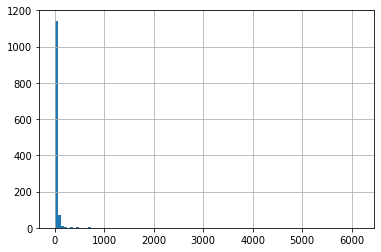

In [145]:
pp_2021['mp_price'].hist(bins=100)

<AxesSubplot:>

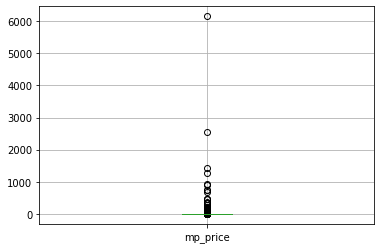

In [146]:
pp_2021.boxplot(column=['mp_price'])

In [148]:
pp_1995.describe()

,mp_price
count,13.000000
mean,1.563738
std,2.194672
min,0.208000
25%,0.235200
50%,0.543400
75%,0.863200
max,5.950000


In [149]:
pp_2021.drop_duplicates()# do this with all years, now its not

,adm0_name,cm_name,mp_price
0,Afghanistan,Bread - Retail,8.167500
1,Afghanistan,Exchange rate - Retail,9.047500
2,Afghanistan,Fuel (diesel) - Retail,8.855000
3,Afghanistan,Oil (cooking) - Retail,20.735000
4,Afghanistan,Pulses - Retail,13.337500
...,...,...,...
1239,Zimbabwe,Oil (vegetable) - Retail,225.000000
1240,Zimbabwe,Rice - Retail,0.531650
1241,Zimbabwe,Salt - Retail,0.558000
1242,Zimbabwe,Sugar - Retail,0.502520


In [147]:
# Example of table
pp_2021[pp_2021['adm0_name'] == 'Afghanistan']

,adm0_name,cm_name,mp_price
0,Afghanistan,Bread - Retail,8.167500
1,Afghanistan,Exchange rate - Retail,9.047500
2,Afghanistan,Fuel (diesel) - Retail,8.855000
3,Afghanistan,Oil (cooking) - Retail,20.735000
4,Afghanistan,Pulses - Retail,13.337500
5,Afghanistan,Rice (high quality) - Retail,12.540000
6,Afghanistan,Rice (low quality) - Retail,10.312500
7,Afghanistan,Salt - Retail,2.750000
8,Afghanistan,Sugar - Retail,7.150000
9,Afghanistan,"Wage (non-qualified labour, non-agricultural) ...",48.913337


<AxesSubplot:>

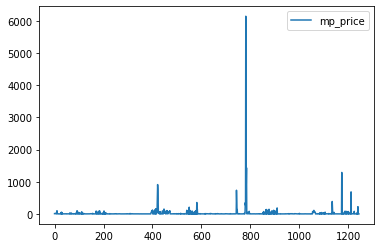

In [92]:
pp_2021.plot()

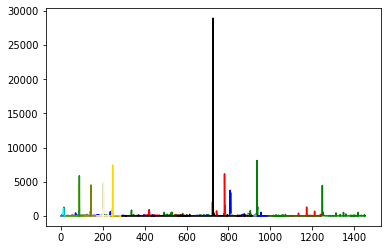

In [141]:
plt.figure();

with pd.plotting.plot_params.use("x_compat", True):
    pp_2021["mp_price"].plot(color="r")
    
    pp_2020["mp_price"].plot(color="g")
    pp_2019["mp_price"].plot(color="b")
    pp_2018["mp_price"].plot(color="darkkhaki")
    pp_2017["mp_price"].plot(color="black")
    #pp_2016["mp_price"].plot(color="gray")
    
    #pp_2015["mp_price"].plot(color="rosybrown")
    #pp_2014["mp_price"].plot(color="brown")
    #pp_2013["mp_price"].plot(color="red")
    #pp_2012["mp_price"].plot(color="coral")
    #pp_2011["mp_price"].plot(color="orange")
    
    #pp_2010["mp_price"].plot(color="burlywood")
    #pp_2009["mp_price"].plot(color="antiquewhite")
    #pp_2008["mp_price"].plot(color="goldenrod")
    pp_2007["mp_price"].plot(color="gold")
    pp_2006["mp_price"].plot(color="beige")
    pp_2005["mp_price"].plot(color="olive")
    
    pp_2004["mp_price"].plot(color="yellow")
    pp_2003["mp_price"].plot(color="forestgreen")
    #pp_2002["mp_price"].plot(color="darkgreen")     # a lot of ejections
    #pp_2001["mp_price"].plot(color="lime")          # a lot of ejections
    #pp_2000["mp_price"].plot(color="aquamarine")    # a lot of ejections
    
    pp_1999["mp_price"].plot(color="azure")
    pp_1998["mp_price"].plot(color="darkcyan")
    pp_1997["mp_price"].plot(color="cyan")
    pp_1996["mp_price"].plot(color="lightblue")
    pp_1995["mp_price"].plot(color="blueviolet")
    
    #pp_1994["mp_price"].plot(color="indigo")
    #pp_1993["mp_price"].plot(color="oldlace")
                

# Проверка на сезонность товаров

Отобразить на одном графике все товары по разным годам (тут даты с 1993 по 2021)

# Самый бедный и самый богатый регион

Постмотреть в среднем сколько стоит товар, сколько на него тратят и посчитать по какой-то формуле что-то по этим странам
Расчитывать по формуле: 

# В каком типа магазина чаще всего закупаются в разных странах

Таблица должна иметь вид страна-тип магазина

# Регрессионная модель предсказывающая цену на продукты на следующий год в разных странах

Должно иметь вид: Страна - продукт - цена на 2022 год